##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: Ajinkya, Miriam, Nienke, Roel
- Performed math exercises: Ajinkya, Miriam, Nienke, Roel
- Performed programming exercises: Ajinkya, Miriam, Nienke, Roel
- Contributed to the overall final assignment: Ajinkya, Miriam, Nienke, Roel

# Chapter 4
## Multilayer perceptron

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).
    
Learning goals:
1. Understand and implement a multi-layer perceptron (MLP) with two weight layers
1. Derive and implement backpropagation
1. Get familiar with the role of softmax units in classification

### Notes on the architecture

You are about to implement a multi-layer perceptron (MLP), using backpropagation to learn weights for classifying the 10 MNIST handwritten digits. The input, hidden, and output node layers are connected with two weight layers. The $n_h$ hidden layer nodes use sigmoid activations, and the 10 output layer nodes use softmax activations; learning the one-hot encoding / representation of the classes. 

### Exercise 1: Properties of activation functions (0.5 points)

The activation functions we have discussed so far were nonlinear. This property is actually required for MLPs to work. Show with a simple mathematical proof that with a linear activation function $f(a) = b a$ (where b is some constant, e.g. $b=2.3$) the forward pass of a multilayer perceptron (MLP) with two weight layers can be written as the forward pass of a single layer perceptron (SLP), and hence could be done more efficiently by a neural network with a single weight layer. 

Hint: The forward pass of a neural network with the weight layers $W^1$ and $W^2$ is $y = g( W^2 h(W^1 x) )$. Here, both $g$ and $f$ are linear activation functions like $f$, but they can have any real valued scalar $b$ (e.g., $g(a)=1.8a$ and $h(a)=1.1a$).

### Solution 1:
Consider an MLP with the following assumptions:

$f(a) = ba$ and $g(a) = ca$, where $b=1.1, c=1.8$

$W^1$ is the first layer weight matrix of size $m \times n$ and $W^2$ is the second layer weight matrix of size $n \times o$

Computing the forward pass,

$y = g( W^2 h(W^1 x) ) = g( W^2 (b.(W^1 x))) = b.g(W^2 W^1 x) = b.c.(W^2 W^1 x) = 1.98 (W^2 W^1 x)$

$  = 1.98 (W'x)$, where $W' = W^2 W^1$ .... ( Eq. 1 )

Now, we consider a SLP with the following assumptions:

$f(a) = ba$, where $b=1.98$

$W$ is the weight matrix of size $m \times o$

Computing the forward pass,

$y = h(W x) = b.(W x) = 1.98(W x)$ .... ( Eq. 2 )

For the above eq. 1 and eq. 2, we observe that the final forward pass equation for a MLP with linear activation functions can also be represented using a SLP with a single linear activation function by using a weight matrix ($W$) equal to the dot product of $W^1$ and $W^2$.



### Exercise 2: Properties of weight initialization (0.5 points)

Initialization of your network's parameters (e.g. weights) can have significant impact on the performance of your network. Consider the scenario where we initialize all parameters with the same constant value. Why would this prevent your network from learning anything sensible and be detrimental to your network's performance?

### Solution 2

When the same constant value is used to initialize all the parameters (weights) of the network, it causes a "symmetry" in the network and stops the network from learning. This "symmetry" hinders the learning process as the gradient values in the backward pass of the network will have the same value which implies that the weights receive the same error signals. Hence no learning will occur as backpropagation learning depends on differing error signals/gradients.

To avoid this, we use small random weight values for initialization and this process is known as "symmetry breaking".

### Exercise 3: The sigmoid activation function (0.5 points)

The hidden layer units apply the sigmoid function on their linear activations $a$: 

$$f(a) = \frac{1}{1+\exp(-a)}$$

To compute backpropagation you will need its derivative again, and you have learned that the sigmoid function derivative has a very simple form. 

Express $\frac{\partial f(a)}{\partial a} = \frac{\partial h}{\partial a}$ in terms of this simple form, and expressed only by the hidden unit output $h$. 

### Solution 3

As derived in assignment 3,

$\frac{\partial f(a)}{\partial a} = f(a)(1-f(a))$

As $\frac{\partial f(a)}{\partial a} = \frac{\partial h}{\partial a}$,

$\frac{\partial f(a)}{\partial a} = h(1-h)$

### Bonus exercise: The softmax cross entropy loss (1 bonus point)

Our MLP should do multi-class classification, i.e. be able to classify all 10 digits in MNIST, not just two. A single output unit with a sigmoid unit would be a 2-way output and would not work here. Instead we use as many output units as we have classes - for MNIST classification, the output is then a binary vector of length 10. Each output represents the probability for the associated class given a certain input. 

This means that in the training set the output unit (vector element) corresponding to the right class has the value 1 (probability 1), and all others are 0. This is a so-called *one-hot encoding* of class labels. Here, a good activation function is the *softmax* activation function, defined as: 

$$ y_k = p(z_k) = \frac{\exp(z_k)}{\sum_{l=1}^K\exp(z_l)} $$

where $K$ represents the number of output units (= classes), and $z_k$ is the activation going into a single of these output units. With softmax, if you want to classify 10 digits, you define 10 output units and apply softmax over the output of each of them. Then the resulting 10 values will: 
* sum up to 1. 
* all be in the range $[0,1]$. 

These properties make it useful for getting the desired probability distribution as output. The output class predicted in the forward pass could then just be the one with the highest probability. 

For learning the right weights we again combine this activation function with the *cross-entropy cost function*: 

$$ L = - \sum_{l=1}^K t_l \lg (y_l) $$

Note that if we would have 2 classes like in the previous assignment, we would have the same definition $L = -t \log(y) - (1 - t)\log(1 - y)$ again, as $t_2 = 1 - t_1$ and $y_2 = 1 - y_1$.


Taking the derivative of the cross entropy loss $\frac{\partial L}{\partial z_k}$ for the softmax and a single softmax input / activation $z_k$, we will get: 

$$ \frac{\partial L}{\partial z_k} = \frac{\partial L}{\partial y_k} \frac{\partial y_k}{\partial z_k} = y_k - t_k$$


**Bonus assignments (0.5 points each)**: 
1. Show how to derive the softmax activation function. You will need to show this for the two cases $i=j: \frac{\partial y_i}{\partial z_i}$ and $i \neq j: \frac{\partial y_i}{\partial z_j}$. 
1. Use your result to derive the cross entropy loss for the softmax function $\frac{\partial L}{\partial z_k}$. 

### Exercise 4: The forward pass (1 point)

The inputs of the network $x$ are MNIST images. In the forward pass a single training data example $x$ (a vector of size $m \times 1$) is weighted by a first weight layer $W^1$ (size $n_h \times m$). Then this activation $a$ is passed into the sigmoid activation function, producing the hidden layer activation $h$ (a vector of size $n_h \times 1$). The hidden unit values $h$ are then weighted by a second layer of weights $W^2$ (size $10 \times n_h$), producing the output unit activation $z$ (a vector of size $10 \times 1$). Then, for each class $k$ there is an output unit with a softmax activation. 

Write down the equations for the activations $a$, $h$, $z$ and a single output unit $y_k$.

Note that in the implementation you can easily compute all $y_k$ at once. 

### Solution 4

\begin{eqnarray*}
a &=&  W^1 \cdot x\\
h &=& \frac{1}{1+\exp(-a)}\\ 
z &=& W^2 \cdot h\\
y_k &=&  \frac{\exp(z_k)}{\sum_{l=1}^K\exp(z_l)}\\
\end{eqnarray*} 

### Exercise 5: Gradient of the last layer (1 point)

To update the weights so to gradually let the network learn the classification, we need the partial derivatives of the weights. To compute the partial derivatives of the weights $W^2$ in the last layer, we have to propagate from the error function back through the softmax activation function to the weights. Obtain $\frac{\partial L}{\partial W^2_{ij}}$ (i.e., $i$ is output, $j$ is input) by applying the chain rule multiple times. $L$ is the cross-entropy loss, and it receives the result of the $K$ softmax output units. 

Start with writing down the chain of partial derivatives, and then fill in the bits and pieces, to arrive at a trivial equation for this gradient.

Notes:
1. Here we derive the gradients for individual data examples. In the examples you will work with multiple examples at once. Basically, we sum all these gradients in order to do one big weight update. Think carefully how you can do this efficiently in your implementation.
1. In the implementation you should obtain all weight updates (i.e., all $i$'s and $j$'s) at once with a single matrix multiplication. Think carefully whether this is a matrix multiplication (np.dot), or an element wise multiplication (*).

### Solution 5:

From the forward pass equations, we can obtain the partial derivatives of weights $W^2$ using chain rule as follows:

$\frac{\partial L}{\partial W^2_{ij}} = \frac{\partial L}{\partial a^2_i} \cdot \frac{\partial a^2_i}{\partial W^2_{ij}}$

$\frac{\partial L}{\partial a^2_i}$ can be further expanded as:

$\frac{\partial L}{\partial a^2_i} = \frac{\partial L}{\partial y^2_i} \cdot \frac{\partial y^2_i}{\partial a^2_i}$

We know the trivial equation of $\frac{\partial L}{\partial a^2_i} = y^2_i - t_i$

Since $a^2_i = \sum_k W^2_{ik} y^1_k$, $\frac{\partial a^2_i}{\partial W^2_{ij}} = y^1_j$

Bringing it all together, 

$\frac{\partial L}{\partial W^2_{ij}} = \frac{\partial L}{\partial a^2_i} \cdot \frac{\partial a^2_i}{\partial W^2_{ij}} \\
= (y^2_i - t_i) \cdot y^1_j$

### Exercise 6: Gradient of the first layer (1.5 points)

To compute the partial derivatives of the weights $W^1$ in the first layer, we have to propagate from the error function back through the last layer into the first layer (i.e., apply backproagation).  In a similar vein as above, using a sequence of the chain rule, derive the chain of partial derivatives to compute $\frac{\partial L}{\partial W^1_{ij}}$ (i.e., $i$ is output, $j$ is input).

Start with writing down the chain of partial derivatives, and then fill in the bits and pieces, to arrive at a trivial equation for this gradient.

Notes:
1. Here we derive the gradients for individual data examples. In the examples you will work with multiple examples at once. Basically, we sum all these gradients in order to do one big weight update. Think carefully how you can do this efficiently in your implementation.
1. In the implementation you should obtain all weight updates (i.e., all $i$'s and $j$'s) at once with a single matrix multiplication. Think carefully whether this is a matrix multiplication (np.dot), or an element wise multiplication (*).

### Solution 6:

From the forward pass equations and gradient of last layer, we can compute the partial derivatives of $W^1$ using chain rule as follows:

$\frac{\partial L}{\partial W^1_{ij}} = \frac{\partial L}{\partial a^1_i} \cdot \frac{\partial a^1_i}{\partial W^1_{ij}}$

As $a^1_i = \sum_k W^1_{ik} \cdot x_k$, $\frac{\partial a^1_i}{\partial W^1_{ij}} = x_j$

Using chain rule, $\frac{\partial L}{\partial a^1_i} = \sum_k \frac{\partial L}{\partial a^2_k} \cdot \frac{\partial a^2_k}{\partial a^1_i}$

From Exercise 5, $\frac{\partial L}{\partial a^2_k} = y^2_k - t_k$.

Expanding $\frac{\partial a^2_k}{\partial a^1_i}$, $\frac{\partial a^2_k}{\partial a^1_i} = \frac{\partial \sum_j W^2_{kj} y^1_j}{\partial a^1_i} = W^2_{ki} \cdot \frac{\partial y^1_i}{\partial a^1_i} \\
= W^2_{ki} \cdot y^1_i(1 - y^1_i)$

Hence, $\frac{\partial L}{\partial a^1_i} = \sum_k \frac{\partial L}{\partial a^2_k} \cdot \frac{\partial a^2_k}{\partial a^1_i} \\
= y^1_i(1 - y^1_i) \cdot \sum_k (y^2_k - t_k) W^2_{ki} = y^1_i(1 - y^1_i) \cdot (y^2_j - t_j) \cdot W^2_{ji}$

Bringing it all together, 

$\frac{\partial L}{\partial W^1_{ij}} = \frac{\partial L}{\partial a^1_i} \cdot \frac{\partial a^1_i}{\partial W^1_{ij}} = (y^2_j - t_j) \cdot y^1_i(1 - y^1_i) \cdot W^2_{ji} \cdot x_j$

### Exercise 7: Implementation (3 points)
Now that all the math is done, we can start implementing the two-layer network for binary classification of two digits, where we make use of sigmoid units and the cross-entropy loss. Write the following functions:
1. `cross_entropy(Y, T)`: Computes the cross entropy loss, averaged over examples `N`. Make sure that there are no exact-zero inputs for `np.log()` (something simple like adding a very small number to `Y` is fine). Note that you sum $L$ over the classes `K` (check the `axis=` parameter of `np.sum`).
1. `sigmoid(A)`: Passes the activity matrix `A` through the sigmoid activation function.
1. `softmax(A)`: Passes the activity matrix `A` through the softmax activation function. Note that you can compute softmax in one literal line. You just need to sum the denominator over the right dimension. 
1. `linear(X, W)`: Computes the activities `A` as `X` weighted by `W`.
1. `forward(X, W1, W2)`: Computes the forward pass for the two-layer network with sigmoid activations in the first and softmax activations in the second node layer. Returns `Y` and `H`. 
1. `backward(X, H, Y, W2, T)`: Computes the backward pass for the two-layer network with sigmoid units and cross-entropy loss.
1. `train_network(X_train, T_train, X_val, T_val, n_epochs, eta)`: Implements the training procedure (train the model on training data, and evaluate on both training and validation data). See the skeleton code for some help. Use the fuction `initialize_weights(n_in, n_out)` to initialize your weights with the right shapes.
1. `test_network(X, W)`: Predicts class labels for a set of `N` new and unseen training data examples, given as `X`. Interpret the output vector of length `10` as a set of probabilities for the class labels `0, 1, 2, 3, 4, 5, 6, 7, 8, 9` (Integer values). For each of the `N` output vectors, return the class label with the highest probability. 

Last time we initialized the weights from a Gaussian normal distribution. This time we initialize them by drawing uniformly from the rule of thumb range $ \left [ - \frac{ \sqrt{6} }{ \sqrt{n + m} },  \frac{ \sqrt{6} }{ \sqrt{ n + m} } \right ] $ ($n\times m$ being the weight matrix dimensions), which  works better here. Weight initialization can have quite some influence on your results. 

### Solution 7

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split

In [2]:
def initialize_weights(P, Q):
    """
    Initializes a weight matrix.
    INPUT:
        P = [int] number of input units
        Q = [int] number of output units
    OUTPUTS
        W = [Q P] the initial weight matrix of Q outputs by P inputs
    """
    r = np.sqrt(6) / np.sqrt(Q + P)
    return np.random.uniform(-r, r, [Q, P])

In [3]:
def cross_entropy(Y, T):
    """
    Computes the cross-entropy loss.
    INPUT:
        Y = [K N] output vector for N examples and K units (classes)
        T = [K N] target vector for N examples and K units (classes)
    OUTPUTS
        L = [flt]  the mean cross-entropy loss
    """
    Y[Y==0] += 0.001
    Y[Y==1] -= 0.001
    cr_ent = -T*np.log(Y) - (1-T)*np.log(1-Y)
    L = cr_ent.sum()/cr_ent.shape[1]
    
    return L

In [4]:
def softmax(Z):
    """
    Computes the softmax activation function. 
    INPUT:
        Z = [10 N] vector of input activations for 10 output units and N examples
    OUTPUTS
        Y = [10 N] the vectors of softmax activations for 10 output units and N examples
    """
    e_Z = np.exp(Z - np.max(Z))
    Y = e_Z / e_Z.sum(axis=0) # numerical stability
    
    return Y

In [5]:
def sigmoid(A):
    """
    Computes the sigmoid activation function.
    INPUT:
        A = [H N] activity matrix of H units for N examples
    OUTPUT
        Y = [H N] output matrix of H units for N examples
    """
    Y = 1/(1+np.exp(-A))
    
    return Y

In [6]:
def linear(X, W):
    """
    Computes the activities for a fully connected layer.
    INPUT:
        X = [P N] data matrix of P input units for N examples
        W = [Q P] weight matrix of P inputs to Q outputs
    OUTPUT
        A = [Q N] activity matrix of Q output units for N examples
    """
    A = np.dot(W,X)
    
    return A

In [7]:
def forward(X, W1, W2):
    """
    Computes the forward pass for a two-layer network with sigmoid units.
    INPUT
        X  = [P  N] data matrix of P inputs for N examples
        W1 = [Q  P] weight matrix of the first layer of P inputs to Q outputs
        W2 = [10 Q] weight vector of the second layer of Q inputs to 10 outputs
    OUTPUT
        H = [Q  N] output matrix of Q hidden units for N examples
        Y = [10 N] output vector for N examples
    """
    A = np.dot(W1,X)
    H = sigmoid(A)
    
    Z = np.dot(W2,H)
    Y = softmax(Z) # y2 = g2 * (W2 * g1(W1 * X))
    
    return H, Y

In [8]:
def backward(X, H, Y, W2, T):
    """
    Computes the backward pass for a two-layer network with sigmoid and softmax units, and cross-entropy loss.  
    INPUT:
        X  = [P  N] data matrix of P inputs for N examples
        H  = [Q  N] output matrix of Q hidden units for N examples (comes from forward pass)
        Y  = [10 N] output probability vectors for N examples n (comes from forward pass)
        W2 = [10 Q] weight vector of the second layer of Q inputs to 10 outputs
        T  = [10 N] a vector of one-hot encoded targets for N examples
    OUTPUT
        dW1 = [Q  P] gradient matrix for the weights of layer 1 of P inputs to Q outputs
        dW2 = [10 Q] gradient matrix for the weights of layer 2 of Q inputs to 10 outputs
    """
    a = Y - T 
    dW2 = np.dot(a, H.T) # (Y - T).H
    
    b = (1 - H)*H
    c = np.dot(W2.T, a)
    d = b * c
    dW1 = np.dot(d, X.T) # (Y - T).H.(1-H).W2.X

    return dW1, dW2

In [9]:
def train_network(X_train, T_train, X_val, T_val, n_hidden=30, n_epochs=500, eta=10**-3):
    """
    Performs the training procedure for a two-layer network with sigmoid and softmax units, and cross-entropy loss. 
    INPUT:
        X_train  = [P  N] data matrix of P inputs for N training examples
        T_train  = [10 N] a vector of targets for N training examples
        X_val    = [P  M] data matrix of P inputs for M validation examples
        T_val    = [10 M] a vector of targets for M validation examples
        n_hidden = [int]  number of hidden units (default 30)
        n_epochs = [int]  number of training epochs (default 500)
        eta      = [flt]  learning rate (default 10^-3)
    OUTPUT:
        W1         = [Q  P] the learned weights for layer 1 of P inputs to Q outputs
        W2         = [10 Q] the learned weights for layer 2 of Q inputs to 10 outputs
        train_loss = [Z  1] the training loss for Z epochs
        val_loss   = [Z  1] the validation loss for Z epochs
    """
    
    # Initialize W1 and W2 (use initialize_weights())
    W1 = initialize_weights(X_train.shape[0], n_hidden)
    W2 = initialize_weights(n_hidden, T_train.shape[0])
    
    # Loop over epochs
    train_loss = np.zeros((n_epochs))
    val_loss = np.zeros((n_epochs))
    
    for i_epoch in range(n_epochs):
        
        # Forward pass
        H, Y_train = forward(X_train, W1, W2)

        # Backward pass
        dW1, dW2 = backward(X_train, H, Y_train, W2, T_train)
        
        # Parameter update
        W1 = W1 - eta * dW1
        W2 = W2 - eta * dW2
        
        # Save loss
        H, Y_val = forward(X_val, W1, W2)
        train_loss[i_epoch] = cross_entropy(Y_train, T_train)
        val_loss[i_epoch] = cross_entropy(Y_val, T_val)
        
        # Print progress and loss
        if i_epoch % 100 == 0:
            print("Epoch {}/{}. Train loss: {:.3f}. Validation loss: {:.3f}.".format(
                1+i_epoch, n_epochs, train_loss[i_epoch], val_loss[i_epoch]))
        
    return W1, W2, train_loss, val_loss

In [10]:
def test_network(X, W1, W2):
    """
    Applies the trained two-layer network with sigmoid units to data.
    INPUT:
        X  = [P  N] data matrix of P inputs for N examples
        W1 = [Q  P] weight matrix of the first layer of P inputs to Q outputs
        W2 = [10 Q] weight vector of the second layer of Q inputs to 10 outputs
    OUTPUT
        classes = [1 N] predicted integer labels from 0 to 9 for N examples
    """
    _,Y = forward(X, W1, W2)
    
    classes = (Y>0.5).astype(int)
    return classes

### Loading the data
Below we first load in (a subset of) the MNIST handwritten digit dataset, and restrict it to two digits. We plot some examples. We split this data into a training and a test set. 

In [11]:
# Read full dataset from mat file
mat = sio.loadmat("digits.mat")

# The data set contains 1000 examples of each class in sequence - create the corresponding label vector: 
T = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).repeat(1000)

# The 1000 examples of the 0-class are currently at the end of the data set. 
# Move them to the beginning. Then we can use np.argmax to get from one-hot encoded class probabilites to
# the original class label: 
X = np.roll(mat["digits"], shift=1000, axis=1)

sz = (28, 28)

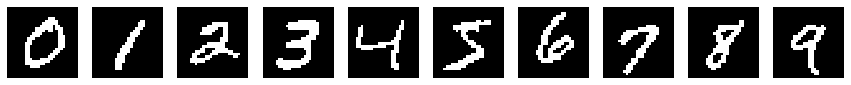

In [12]:
# Plot some examples
fig, ax = plt.subplots(1, 10)
fig.set_size_inches([15, 7])
for i in range(10):
    ax[i].imshow(X[:, 0 + i*1000].reshape(sz).T, cmap="gray")
    ax[i].set_axis_off()

In [13]:
# Split dataset in training, validation, and testing split
X_train, X_test, T_train, T_test = train_test_split(X.T, T, test_size=0.2)
X_train, X_val, T_train, T_val = train_test_split(X_train, T_train, test_size=0.2)

# Transpose back
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T

# Transform the label sets used in training to one-hot vectors: 
T_train = np.eye(10)[T_train].T
T_val = np.eye(10)[T_val].T

# Print dimensions
print("Dimensions training inputs: {}, and training outputs: {}".format(X_train.shape, T_train.shape))
print("Dimensions validation inputs: {}, and validation outputs: {}".format(X_val.shape, T_val.shape))
print("Dimensions testing inputs: {}, and testing outputs: {}".format(X_test.shape, T_test.shape))

Dimensions training inputs: (784, 6400), and training outputs: (10, 6400)
Dimensions validation inputs: (784, 1600), and validation outputs: (10, 1600)
Dimensions testing inputs: (784, 2000), and testing outputs: (2000,)


### Exercise 8: Training (1 point)
Now that we have done all the work, we can finally run the multilayer perceptron to learn classifying digits. 

1. Train your network on the training dataset `X_train` and `T_train`, and validate it at each epoch on the test set `X_val` and `T_val`. Use de default values for the number of hidden units, learning rate, and number of epochs.
1. After training, plot the train and validation losses over epochs (as returned by `train_network()`.

### Solution 8

Epoch 1/500. Train loss: 3.396. Validation loss: 4.113.
Epoch 101/500. Train loss: 0.641. Validation loss: 1.128.
Epoch 201/500. Train loss: 0.190. Validation loss: 0.506.
Epoch 301/500. Train loss: 0.154. Validation loss: 0.526.
Epoch 401/500. Train loss: 0.093. Validation loss: 0.525.


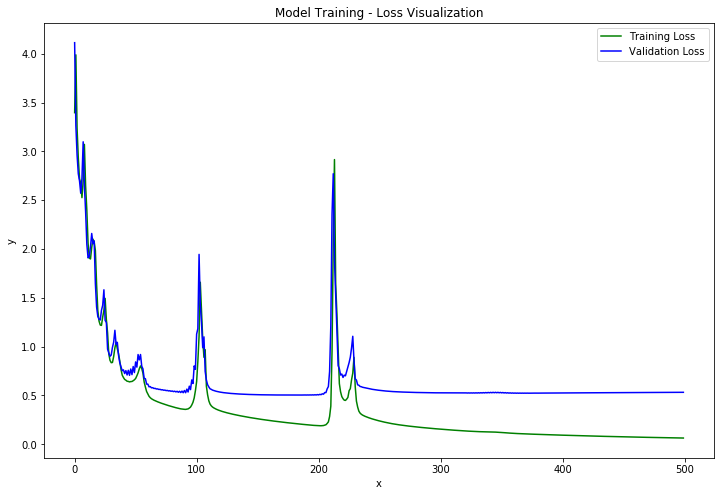

In [14]:
# Train network
W1, W2, train_loss, val_loss = train_network(X_train, T_train, X_val, T_val, n_hidden=30, n_epochs=500, eta=10**-3)

# Plot losses
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, 500, 1), train_loss, 'g-', label='Training Loss')
plt.plot(np.arange(0, 500, 1), val_loss, 'b-', label='Validation Loss')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Training - Loss Visualization')
plt.legend(loc='best')
plt.show()

### Exercise 9: Testing (1 point)
Now that the network is trained, we can obtain a test score on a held out test set, and compute a classification performance. Apply your network to the test set `X_test` and `T_test`, and print its accuracy. 

If everything went fine, the accuracy should be above 90%, which is fine as we only use 1/6 of the original MNIST data set.

### Solution 9

In [15]:
# Test network
W1 = initialize_weights(len(X_test), 30)
W2 = initialize_weights(30, len(X_test))
T_pred = test_network(X_test, W1, W2)

# Print accuracy
T_acc = (T_test == T_pred).sum()/T_test.size
print("Test accuracy: {:.2f}%".format(T_acc))

Test accuracy: 81.14%


### What has the network learned?

What has the MLP learned to be able to classify the digits with relatively high accuracy? We can easily inspect a part of the network, that is the weights coming directly after the input nodes (i.e. the first layer weights) to check which patterns the MLP deemed important for correct classification at this stage (for higher layers this inspection is more complicated, and an active research field). 

For this we just need to reshape the first layer weights leading from all input values to a hidden unit to $28 \times 28$. We do this separately for each hidden unit to check what each of them represents or detects. These patterns act a bit like *receptive fields*.

When you have trained the full network, just run the code in the next cell to check the learned pattern detectors in the first layer. 

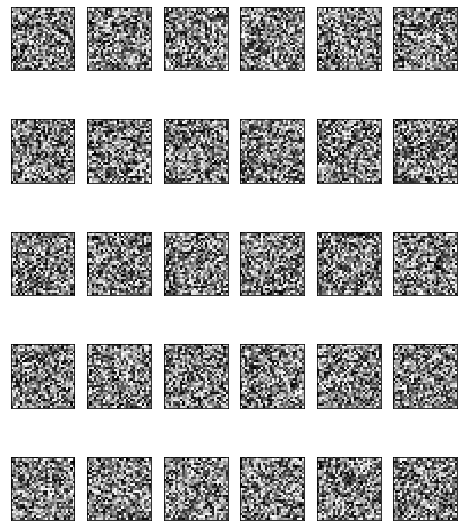

In [16]:
n_hidden = W1.shape[0]

plt.figure(figsize=([8,10]))
for i in range(n_hidden):    
    plt.subplot(5,6,i+1)
    fig = plt.imshow(W1[i, :].reshape([28,28]).T, cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)